In [1]:
import numpy as np
import matplotlib as plt
import os
import copy
from datetime import datetime
from wordcloud import WordCloud

In [2]:
last = set()
current = set()
additions = set()
subtractions = set()
for diff in sorted(os.listdir("diffs")):
    timestamp = diff.replace('.txt', '')
    with open(f'diffs/{diff}', "r") as diff_file:
        for line in diff_file.readlines():
            current.add(line.strip())
    print(timestamp)
    additions = current - last
    for item in additions:
        print(f'+ {item}')
    subtractions = last - current
    for item in subtractions:
        print(f'- {item}')
    print('\n')
    last = copy.deepcopy(current)
    current.clear()
    additions.clear()
    subtractions.clear()

20171206081009
+ About intimate media on Twitter
+ Guidelines for law enforcement
+ Following limit FAQs
+ About rules and best practices with account behaviors
+ Twitter, our services, and corporate affiliates
+ How to contact Twitter about media concerning a deceased family member
+ About Twitter limits
+ Vine Camera Terms of Service and privacy policy
+ Update to our Privacy Policy
+ Report violations
+ Username squatting policy
+ How to contact Twitter about a deceased family member's account
+ Twitter Moments guidelines and principles
+ Impersonation policy
+ About private information on Twitter
+ Twitter media policy
+ Hateful conduct policy
+ About the Twitter Experiments Program
+ Our approach to policy development and enforcement philosophy
+ Twitter’s use of cookies and similar technologies
+ Fair use policy
+ Twitter Commerce Terms
+ About user research at Twitter
+ Counterfeit policy
+ Legal request FAQs
+ About grievance officer - India
+ The Twitter Rules
+ How to report 

In [3]:
changes_per_year = dict()
for diff in sorted(os.listdir("diffs")):
    year = diff[:4]
    if year not in changes_per_year:        
        changes_per_year[year] = 0
    changes_per_year[year] += 1
print(changes_per_year)

{'2017': 2, '2018': 10, '2019': 12, '2020': 12, '2021': 1, 'pres': 1}


In [4]:
changes_per_month_year = dict()
for diff in sorted(os.listdir("diffs")):
    year = diff[:4]
    month = diff[4:6]
    if f'{year}-{month}' not in changes_per_month_year:
        changes_per_month_year[f'{year}-{month}'] = 0
    changes_per_month_year[f'{year}-{month}'] += 1
print(changes_per_month_year)

{'2017-12': 2, '2018-02': 1, '2018-03': 1, '2018-04': 5, '2018-05': 2, '2018-06': 1, '2019-03': 1, '2019-04': 3, '2019-06': 4, '2019-09': 1, '2019-10': 1, '2019-12': 2, '2020-02': 1, '2020-05': 2, '2020-07': 2, '2020-08': 1, '2020-09': 1, '2020-10': 4, '2020-12': 1, '2021-04': 1, 'pres-en': 1}


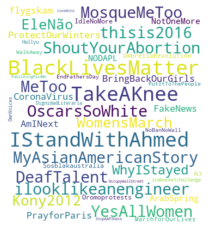

In [14]:
with open('hashtags.txt', 'r') as hashtag_text:
    wordcloud = WordCloud(background_color="white", width=360, height=400).generate(hashtag_text.read())
    plt.pyplot.figure()
    plt.pyplot.imshow(wordcloud, cmap=plt.cm.gray, interpolation='bilinear')
    plt.pyplot.axis('off')
    plt.pyplot.show()
    wordcloud.to_file('test.png')